# Predicting Fire Alarms using Smoke Detection Dataset

The objective of this project it to predict the presence of fire in an area using parameters that the smoke detector sensores measure. Therefore, this project will not focus much on interpretation.

## Importing libraries

In [1]:
# Reading the data and dataset manipulation
import pandas as pd

# Linear algebra
import numpy as np

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Pipeline
from sklearn.pipeline import Pipeline

# Model selection

from sklearn.model_selection import GridSearchCV, train_test_split

# Model evaluation
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, auc

## Ignore warnings

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Reading the dataset

In [3]:
filename = '../input/smoke-detection-dataset/smoke_detection_iot.csv'

In [4]:
data = pd.read_csv(filename, index_col=0)
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## Exploring the dataset

In [5]:
data.shape

(62630, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


There are no missing values in the dataset, and all of the data is numeric.

In [7]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [8]:
data[data.duplicated()].sum()

UTC               0.0
Temperature[C]    0.0
Humidity[%]       0.0
TVOC[ppb]         0.0
eCO2[ppm]         0.0
Raw H2            0.0
Raw Ethanol       0.0
Pressure[hPa]     0.0
PM1.0             0.0
PM2.5             0.0
NC0.5             0.0
NC1.0             0.0
NC2.5             0.0
CNT               0.0
Fire Alarm        0.0
dtype: float64

No duplicates are present in the dataset

In [9]:
data.corr()['Fire Alarm'][:-1].sort_values(ascending=False)

CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
UTC              -0.389404
Name: Fire Alarm, dtype: float64

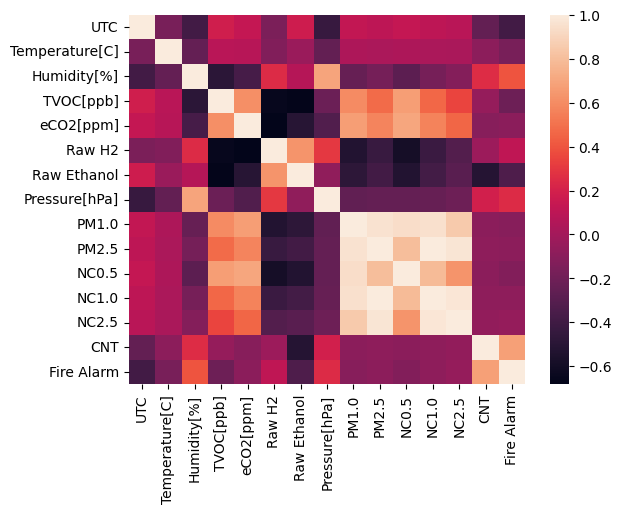

In [10]:
ax = sns.heatmap(data.corr())

In [11]:
target_column = 'Fire Alarm'
X = data.loc[:, data.columns != target_column]
y = data[[target_column]]

## Scaling the feature columns

In [12]:
scaler = MinMaxScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0.050600,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.050603,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004
2,0.050605,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008
3,0.050607,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012
4,0.050610,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016


In [14]:
import joblib
joblib.dump(scaler, '../out/minmax_scaler.joblib')

['../out/minmax_scaler.joblib']

## Check for unbalanced classes

In [13]:
data['Fire Alarm'].value_counts(normalize=True)

Fire Alarm
1    0.714626
0    0.285374
Name: proportion, dtype: float64

Here we can see that there is an imbalance in the classes of our target label

## Split data into train and test splits

**Note:** since there are imbalance between classes we will stratify the train and test splits

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [15]:
X_test.shape

(12526, 14)

In [16]:
y_train.value_counts(normalize=True)

Fire Alarm
1             0.714634
0             0.285366
Name: proportion, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

Fire Alarm
1             0.714594
0             0.285406
Name: proportion, dtype: float64

The splits hold the same class ratio as the dataset

## Models

### Random state

In [18]:
rs = 42

### Create class weights

In [19]:
class_weight = {}
class_weight[0] = y_test.value_counts(normalize=True)[1]
class_weight[1] = y_test.value_counts(normalize=True)[0]

### Models

In [20]:
# Logistic Regression
lr = LogisticRegression(random_state=rs)
lr_parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'class_weight' : [None, class_weight],
    'C' : [0.5, 1, 1.5],
    'solver' : ['saga'],
    'max_iter': [100]
    
}

# Random Forest
rf = RandomForestClassifier(random_state=rs)
rf_parameters = { 
    'n_estimators': [50, 100, 150],
    'max_depth' : [5, 10, 15, 20],
    'criterion' :['gini', 'entropy']
}

# ADA Boost
ab = AdaBoostClassifier(random_state=rs)
ab_parameters = {
    'n_estimators': [50, 100, 150], 
    'algorithm' : ['SAMME', 'SAMME.R'],
    'learning_rate' : [0.5, 1, 1.5]
}

# Support Vector Machines
sv = SVC(random_state=rs)
sv_parameters = {
    'C' : [0.5, 1, 1.5],
    'kernel' : ['rbf', 'linear'],
    'class_weight' : [None, class_weight]
}

# K Nearest Neighbors
knn = KNeighborsClassifier()
knn_parameters = {
    'n_neighbors' : [5, 10, 15],
    'algorithm' : ['auto', 'ball_tree']
}

In [21]:
# Logistic Regression Gridsearch
gs_lr = GridSearchCV(lr, param_grid=lr_parameters, scoring='f1')

# Random Forest Gridsearch
gs_rf = GridSearchCV(rf, param_grid=rf_parameters, scoring='f1')

# ADA Boost Gridsearch
gs_ab = GridSearchCV(ab, param_grid=ab_parameters, scoring='f1')

# Support Vector Machines Gridsearch
gs_sv = GridSearchCV(sv, param_grid=sv_parameters, scoring='f1')

# K Nearest Neighbors Gridsearch
gs_knn = GridSearchCV(knn, param_grid=knn_parameters, scoring='f1')

In [22]:
def train_evaluate(estimator, name, X_train, X_test, y_train, y_test):
    result = {}
    result['Estimator'] = name
    estimator.fit(X_train, y_train.values.ravel())
    y_pred = estimator.predict(X_test)
    result['Accuracy'] = accuracy_score(y_true=y_test, y_pred=y_pred)
    result['Precision'] = precision_score(y_true=y_test, y_pred=y_pred)
    result['Recall'] = recall_score(y_true=y_test, y_pred=y_pred)
    result['F1'] = f1_score(y_true=y_test, y_pred=y_pred)
    return result

In [23]:
results = []

### Run grid searches

In [24]:
results.append(train_evaluate(gs_lr, 'Logistic Regression', X_train, X_test, y_train, y_test))

In [25]:
results.append(train_evaluate(gs_rf, 'Random Forest', X_train, X_test, y_train, y_test))

In [26]:
results.append(train_evaluate(gs_ab, 'ADA Boost', X_train, X_test, y_train, y_test))

In [27]:
results.append(train_evaluate(gs_sv, 'Support Vector Machines', X_train, X_test, y_train, y_test))

In [28]:
results.append(train_evaluate(gs_knn, 'K Nearest Neighbors', X_train, X_test, y_train, y_test))

In [39]:
from joblib import dump

dump(gs_lr, '../out/logistic_regression_model.joblib')
dump(gs_rf, '../out/random_forest_model.joblib')
dump(gs_ab, '../out/ada_boost_model.joblib')
dump(gs_sv, '../out/svm_model.joblib')
dump(gs_knn, '../out/knn_model.joblib')

['../out/knn_model.joblib']

In [29]:
results = pd.DataFrame(results)
results

,Estimator,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.988424,0.993499,0.990280,0.991887
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,ADA Boost,0.999920,1.000000,0.999888,0.999944
3,Support Vector Machines,0.999601,0.999553,0.999888,0.999721
4,K Nearest Neighbors,0.999920,1.000000,0.999888,0.999944


## Test

In [40]:
from joblib import load

def test(model, X_test=X_test, y_test=y_test):
    result = {}
    y_pred = model.predict(X_test)
    result['Accuracy'] = accuracy_score(y_true=y_test, y_pred=y_pred)
    result['Precision'] = precision_score(y_true=y_test, y_pred=y_pred)
    result['Recall'] = recall_score(y_true=y_test, y_pred=y_pred)
    result['F1'] = f1_score(y_true=y_test, y_pred=y_pred)
    print(result)

ada_boost_model = load('../out/ada_boost_model.joblib')
knn_model = load('../out/knn_model.joblib')
logistic_regression_model = load('../out/logistic_regression_model.joblib')
random_forest_model = load('../out/random_forest_model.joblib')
svm_model = load('../out/svm_model.joblib')

test(ada_boost_model)
test(knn_model)
test(logistic_regression_model)
test(random_forest_model)
test(svm_model)

{'Accuracy': 0.9999201660546064, 'Precision': 1.0, 'Recall': 0.9998882806390348, 'F1': 0.9999441371990392}
{'Accuracy': 0.9999201660546064, 'Precision': 1.0, 'Recall': 0.9998882806390348, 'F1': 0.9999441371990392}
{'Accuracy': 0.9884240779179307, 'Precision': 0.993499215422551, 'Recall': 0.9902804155960228, 'F1': 0.9918872041627035}
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0}
{'Accuracy': 0.9996008302730321, 'Precision': 0.999553272280545, 'Recall': 0.9998882806390348, 'F1': 0.9997207483943032}


## Choosing the best model

Looking at the table above, it is clear that the random forest classifier scored the highest across all evaluation metrics. Hence, it is the best model to choose.

## Insights

Eventhough the random forest classifier scored a perfect score at all metrics, we still need to test this model on a larger dataset with more randomness, to ensure that there are no data leakage or overfitting is occured

## Suggestions

Train and test the random forest classifier on a larger dataset or use pickle to store the current model and test it on future incomming data